<div align="center">
    <h1>Heart Disease Prediction</h1>
</div>

<img src="https://i.pinimg.com/originals/bf/64/52/bf6452c22940583352fd1d4f06be198f.jpg" alt="Sample Image" width="600"/>

### 1. Business Problem 

#### Our business initiative aims to identify key risk factors for heart disease and develop a logistic regression model to predict overall cardiovascular risk. The goal is to empower individuals and healthcare professionals with timely insights, fostering proactive interventions for risk reduction and improved health outcomes.

In [4]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

C:\Users\user\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\user\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


Data 
Data Source References:
https://www.kaggle.com/amanajmera1/framingham-heart-study-dataset/data


In [5]:
df = pd.read_csv("C:/Users/user/Downloads/framingham.csv")
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


### 2. Exploratory Data Analysis

In [8]:
# Correlation of independent variables with target variable 
df.corrwith(df['TenYearCHD'])*100

male                 8.842757
age                 22.525610
education           -5.405896
currentSmoker        1.945627
cigsPerDay           5.788426
BPMeds               8.748858
prevalentStroke      6.180995
prevalentHyp        17.760273
diabetes             9.731651
totChol              8.218428
sysBP               21.642904
diaBP               14.529910
BMI                  7.519193
heartRate            2.291261
glucose             12.554400
TenYearCHD         100.000000
dtype: float64

<AxesSubplot:>

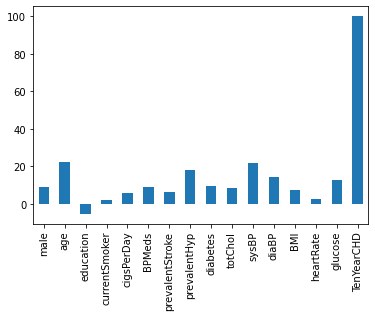

In [9]:
(df.corrwith(df['TenYearCHD'])*100).plot(kind='bar')

#### correlation of target column with current smoker and heartrate is very low¶

In [10]:
# Let us drop education as it has negative correlation with target variable. 
df = df.drop(['education'],axis=1)

In [11]:
df.shape

(4238, 15)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   currentSmoker    4238 non-null   int64  
 3   cigsPerDay       4209 non-null   float64
 4   BPMeds           4185 non-null   float64
 5   prevalentStroke  4238 non-null   int64  
 6   prevalentHyp     4238 non-null   int64  
 7   diabetes         4238 non-null   int64  
 8   totChol          4188 non-null   float64
 9   sysBP            4238 non-null   float64
 10  diaBP            4238 non-null   float64
 11  BMI              4219 non-null   float64
 12  heartRate        4237 non-null   float64
 13  glucose          3850 non-null   float64
 14  TenYearCHD       4238 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 496.8 KB


In [13]:
df.describe()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


##### Missing Value Treatment

In [15]:
df.isnull().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [16]:
count=0
for i in df.isnull().sum(axis=1):
    if i>0:
        count=count+1
print('Total number of rows with missing values is ', count)
print('since it is only',round((count/len(df.index))*100), 'percent of the entire dataset the rows with missing values are excluded.')

Total number of rows with missing values is  489
since it is only 12 percent of the entire dataset the rows with missing values are excluded.


In [17]:
df.dropna(axis=0,inplace=True)

In [18]:
df.isnull().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

##### Univariate Data Analysis

In [276]:
df.TenYearCHD.value_counts()

0    3177
1     572
Name: TenYearCHD, dtype: int64

In [20]:
df.TenYearCHD.value_counts(normalize=True)

TenYearCHD
0    0.847426
1    0.152574
Name: proportion, dtype: float64

<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

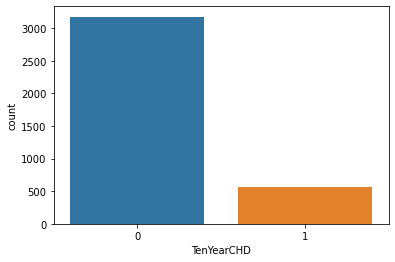

In [279]:
sns.countplot(x='TenYearCHD',data=df)

* There are 3177 patients with no heart disease and 572 patients with risk of heart disease.

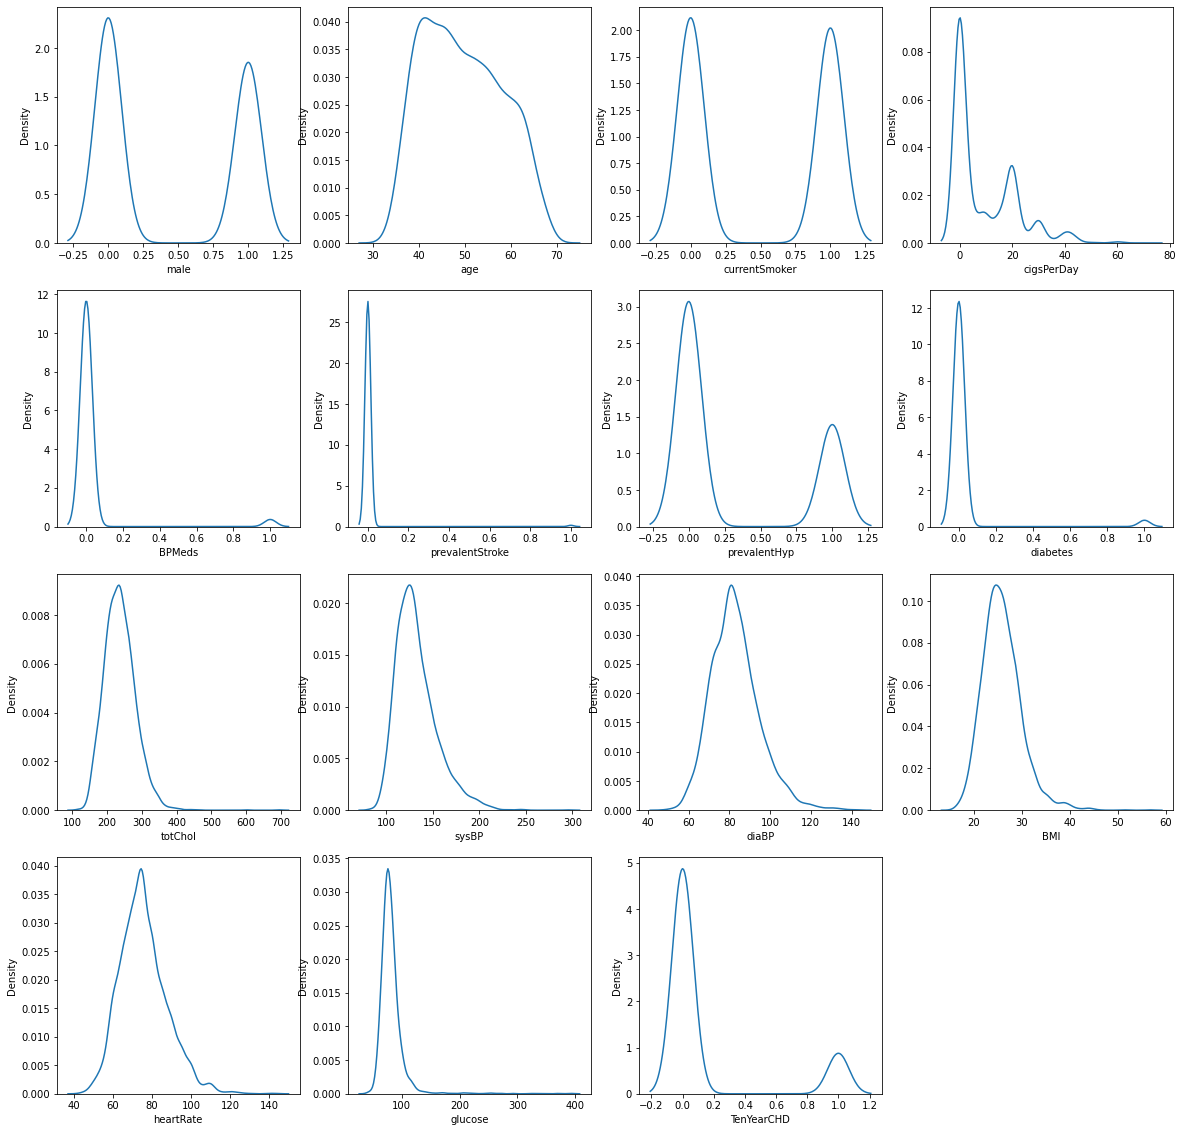

In [228]:
l=['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']
plt.figure(figsize=(20,20))
for i in range(1,16):
    plt.subplot(4,4,i)
    sns.distplot(df[l[i-1]],hist=False)

In [19]:
#sns.pairplot(data=df)

<AxesSubplot:>

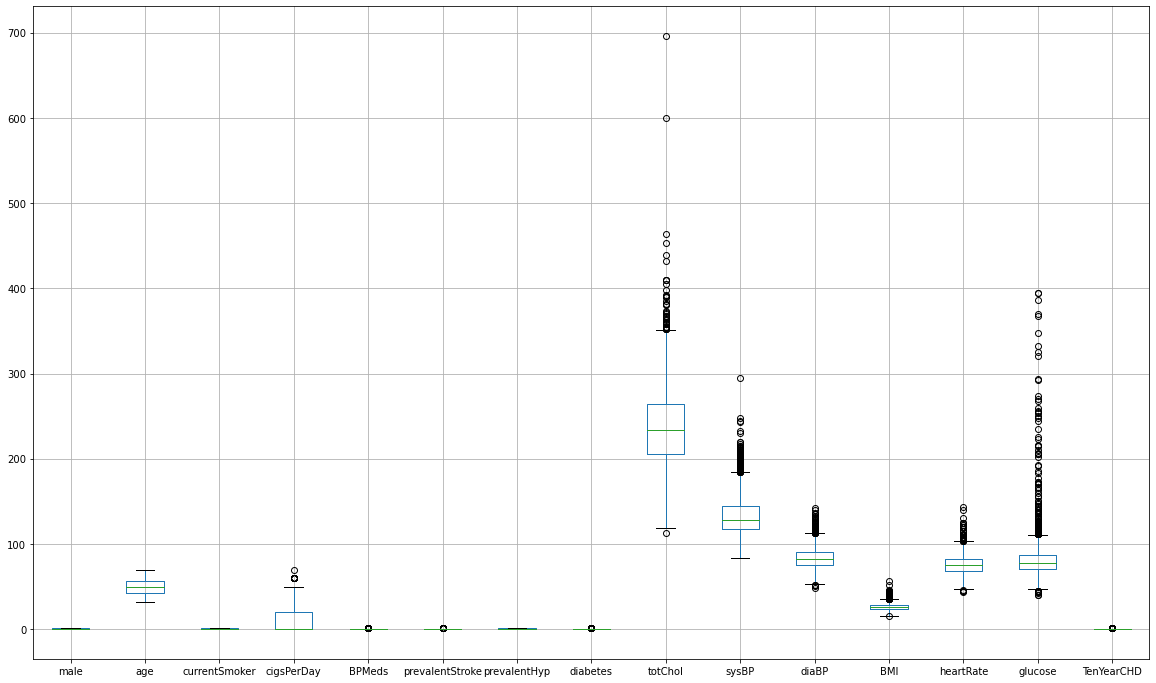

In [229]:
plt.figure(figsize=(20,12))
df.boxplot()

#### Normal Q-Q plot

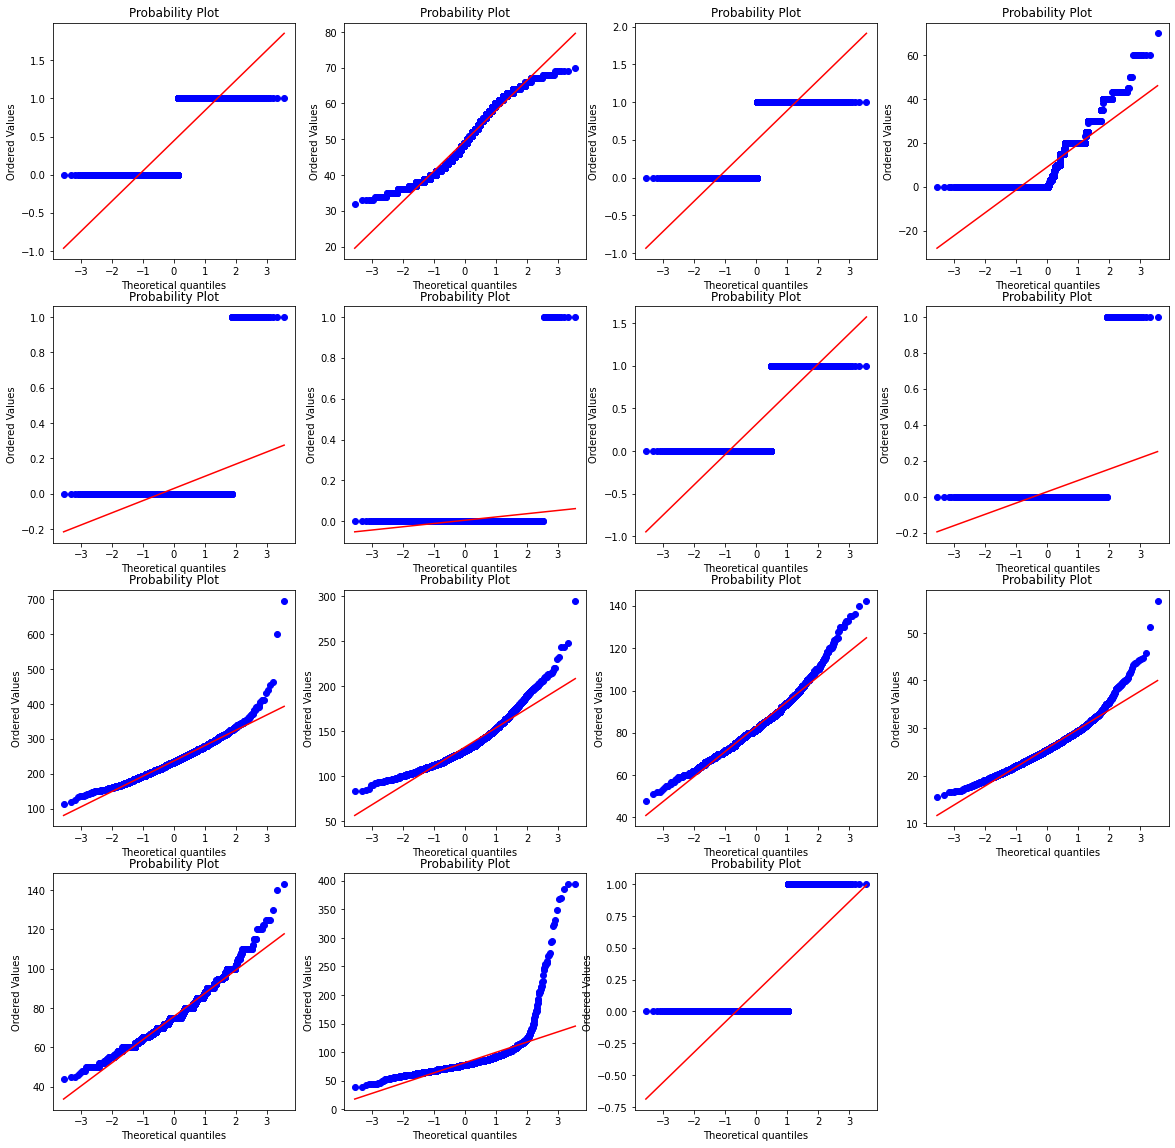

In [230]:
l=['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']
plt.figure(figsize=(20,20))
for i in range(1,16):
    plt.subplot(4,4,i)
    stats.probplot(df[l[i-1]],dist='norm',plot=plt)

#### discretization is a technique of converting continues variable into discrete variable it can improve our accuracy there are 3 ways to do that quantile,uniform and kbins

In [231]:
from sklearn.preprocessing import KBinsDiscretizer

In [232]:
kb=KBinsDiscretizer(n_bins=3,encode='ordinal',strategy='quantile',)
df['age']=kb.fit_transform(df[['age']])

In [233]:
df1 = df.copy()
df

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,0.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,1.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,2.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,1.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4231,1,2.0,0,0.0,0.0,0,1,0,187.0,141.0,81.0,24.96,80.0,81.0,0
4232,1,2.0,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0,1
4233,1,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,1.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0


* Transformation is applied to normalize the columns here standardization is also done internally so no need to standardization

In [234]:
from sklearn.preprocessing import PowerTransformer

In [235]:
pt = PowerTransformer()
df1 = df1.drop(columns='TenYearCHD')
x = pt.fit_transform(df1)
df1 = pd.DataFrame(x,columns=df1.columns)

In [236]:
df1

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1.116358,-1.339477,-0.977057,-0.937674,-0.177093,-0.075054,-0.673128,-0.167237,-0.961381,-1.467897,-1.142367,0.405273,0.450644,-0.069467
1,-0.895770,-0.007342,-0.977057,-0.937674,-0.177093,-0.075054,-0.673128,-0.167237,0.386359,-0.427489,-0.069974,0.803677,1.516879,-0.147081
2,1.116358,-0.007342,1.023482,1.150819,-0.177093,-0.075054,-0.673128,-0.167237,0.277339,-0.062404,-0.158966,-0.001549,0.037849,-0.668454
3,-0.895770,1.169616,1.023482,1.322251,-0.177093,-0.075054,1.485602,-0.167237,-0.183305,0.927154,1.035695,0.771218,-0.902131,1.342585
4,-0.895770,-0.007342,1.023482,1.211449,-0.177093,-0.075054,-0.673128,-0.167237,1.090985,0.066969,0.188163,-0.631890,0.832207,0.474586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3744,1.116358,1.169616,-0.977057,-0.937674,-0.177093,-0.075054,1.485602,-0.167237,-1.190096,0.574517,-0.069974,-0.102279,0.450644,0.218461
3745,1.116358,1.169616,-0.977057,-0.937674,-0.177093,-0.075054,1.485602,-0.167237,-1.521845,1.504623,1.175298,-0.619811,-1.443013,0.078811
3746,1.116358,-0.007342,1.023482,-0.317077,-0.177093,-0.075054,1.485602,-0.167237,1.592338,1.792892,0.818504,0.160387,-0.800203,0.534227
3747,1.116358,-0.007342,1.023482,1.463028,-0.177093,-0.075054,-0.673128,-0.167237,-0.636064,-0.115789,-0.158966,-1.789553,-0.902131,-0.866622


In [237]:
df1.columns

Index(['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose'],
      dtype='object')

In [238]:
df1.isnull().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
dtype: int64

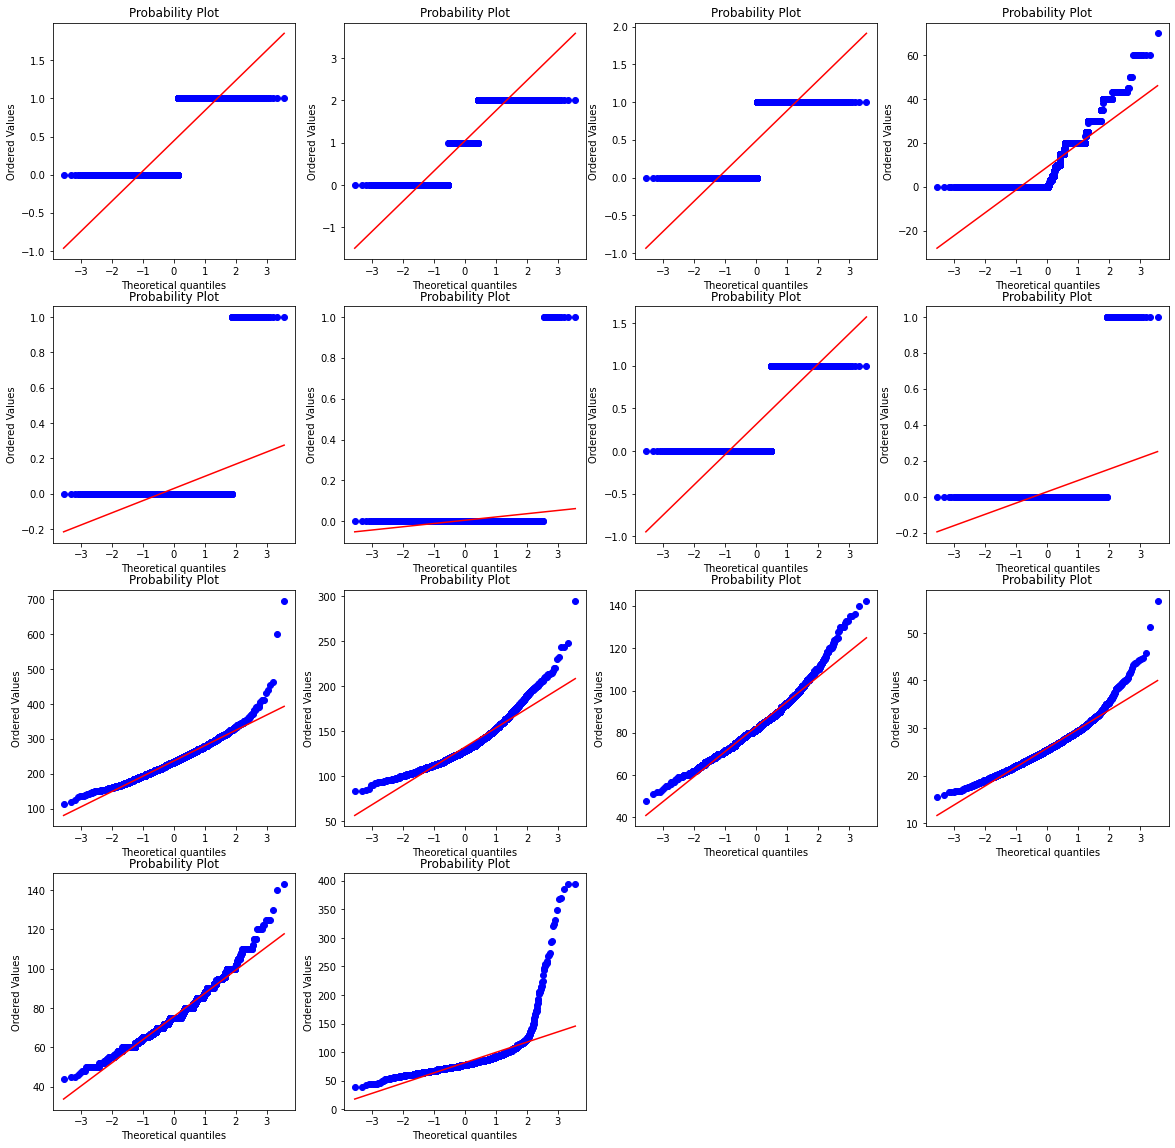

In [239]:
l=['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose']
plt.figure(figsize=(20,20))
for i in range(1,15):
    plt.subplot(4,4,i)
    stats.probplot(df[l[i-1]],dist='norm',plot=plt)

* we can see the effect of power transformation on last 6 columns they align on the line

<AxesSubplot:>

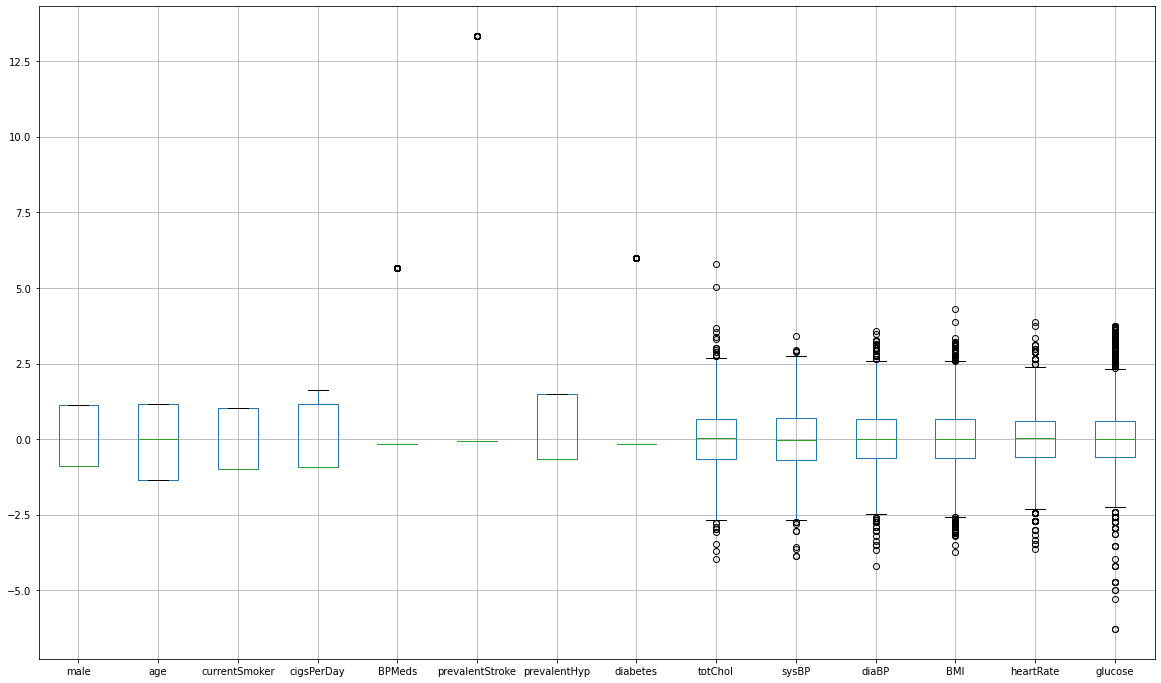

In [240]:
df1.boxplot(figsize=(20,12))

* There is outliers in 6 columns we can use interqartile methode or z-score method

### Principle Component Analysis

* pca is applied to convert high dimension data in low dimension without loosing the covariance it reduces computational time and increases the visualization.
* It helps to find the most significant features in a dataset and makes the data easy for plotting

In [241]:
from sklearn.decomposition import PCA

In [242]:
pca = PCA()
df2 = pca.fit_transform(df1)

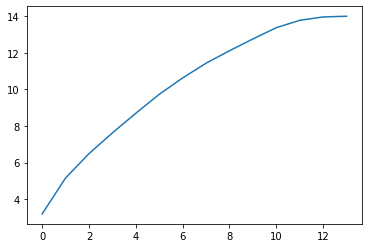

In [243]:
plt.plot(np.cumsum(pca.explained_variance_))

In [244]:
df.dtypes

male                 int64
age                float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

### Model fitting

In [245]:
x = df1
x

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1.116358,-1.339477,-0.977057,-0.937674,-0.177093,-0.075054,-0.673128,-0.167237,-0.961381,-1.467897,-1.142367,0.405273,0.450644,-0.069467
1,-0.895770,-0.007342,-0.977057,-0.937674,-0.177093,-0.075054,-0.673128,-0.167237,0.386359,-0.427489,-0.069974,0.803677,1.516879,-0.147081
2,1.116358,-0.007342,1.023482,1.150819,-0.177093,-0.075054,-0.673128,-0.167237,0.277339,-0.062404,-0.158966,-0.001549,0.037849,-0.668454
3,-0.895770,1.169616,1.023482,1.322251,-0.177093,-0.075054,1.485602,-0.167237,-0.183305,0.927154,1.035695,0.771218,-0.902131,1.342585
4,-0.895770,-0.007342,1.023482,1.211449,-0.177093,-0.075054,-0.673128,-0.167237,1.090985,0.066969,0.188163,-0.631890,0.832207,0.474586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3744,1.116358,1.169616,-0.977057,-0.937674,-0.177093,-0.075054,1.485602,-0.167237,-1.190096,0.574517,-0.069974,-0.102279,0.450644,0.218461
3745,1.116358,1.169616,-0.977057,-0.937674,-0.177093,-0.075054,1.485602,-0.167237,-1.521845,1.504623,1.175298,-0.619811,-1.443013,0.078811
3746,1.116358,-0.007342,1.023482,-0.317077,-0.177093,-0.075054,1.485602,-0.167237,1.592338,1.792892,0.818504,0.160387,-0.800203,0.534227
3747,1.116358,-0.007342,1.023482,1.463028,-0.177093,-0.075054,-0.673128,-0.167237,-0.636064,-0.115789,-0.158966,-1.789553,-0.902131,-0.866622


In [246]:
y = df['TenYearCHD']
y

0       0
1       0
2       0
3       1
4       0
       ..
4231    0
4232    1
4233    1
4234    0
4237    0
Name: TenYearCHD, Length: 3749, dtype: int64

### Train test split

In [247]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=101,stratify=y)

In [248]:
#No of rows should match if splitting is done correctly
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((2999, 14), (750, 14), (2999,), (750,))

### Logistic Regression

In [249]:
from sklearn.linear_model import LogisticRegression

In [250]:
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)

LogisticRegression()

In [251]:
y_predict = logmodel.predict(x_test)

In [252]:
logmodel.score(x_train, y_train)

0.8549516505501834

In [253]:
logmodel.score(x_test,y_test)

0.8466666666666667

In [254]:
print('Train Score is : ' , logmodel.score(x_train, y_train))
print('Test Score is : ' , logmodel.score(x_test, y_test))

Train Score is :  0.8549516505501834
Test Score is :  0.8466666666666667


In [255]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92       636
           1       0.44      0.04      0.07       114

    accuracy                           0.85       750
   macro avg       0.65      0.51      0.49       750
weighted avg       0.79      0.85      0.79       750



In [256]:
from sklearn.metrics import confusion_matrix

In [257]:
cm = confusion_matrix(y_test,y_predict)
cm

* The confusion matrix shows 631+4 = 635 correct predictions and 110+5 = 115 incorrect ones.
    * True Positives: 4
    * True Negatives: 631
    * False Positives: 5 (Type I error)
    * False Negatives: 110 ( Type II error)

In [258]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

In [259]:
print('Accuracy of model is:',(TP+TN)/(TP+TN+FP+FN))
print('The misclassification is (1-accuracy):', 1-(TP+TN)/(TP+TN+FP+FN))
print('Sensitivity or TPR is:',TP/(TP+FN))
print('Specificity or FPR is:',FP/(FP+TN))
print('Precision or Positive predict value is:',TP/(TP+FP))
print('Negative predict value is:',TN/(TN+FN))

Accuracy of model is: 0.8466666666666667
The misclassification is (1-accuracy): 0.15333333333333332
Sensitivity or TPR is: 0.03508771929824561
Specificity or FPR is: 0.007861635220125786
Precision or Positive predict value is: 0.4444444444444444
Negative predict value is: 0.8515519568151148


* From the above statistics it is clear that the model is highly specific than sensitive. 
* The negative values are predicted more accurately than the positives.

#### Predicted probabilities of 0 (No Coronary Heart Disease) and 1 ( Coronary Heart Disease: Yes) for the test data with a default classification threshold of 0.5

In [21]:
y_pred_prob=logmodel.predict_proba(x_test)[:,:]
y_pred_prob_df=pd.DataFrame(data=y_pred_prob, columns=['Prob of no heart disease (0)','Prob of Heart Disease (1)'])
y_pred_prob_df.head()

NameError: name 'logmodel' is not defined

### For Lower Threshold

* Since the model is predicting Heart disease too many type II errors is not advisable. A False Negative ( ignoring the probability of disease when there actualy is one) is more dangerous than a False Positive in this case. Hence inorder to increase the sensitivity, threshold can be lowered.

In [261]:
from sklearn.preprocessing import binarize
for i in range(1,5):
    cm2=0
    y_pred_prob_yes=logmodel.predict_proba(x_test)
    y_pred2=binarize(y_pred_prob_yes,i/10)[:,1]
    cm2=confusion_matrix(y_test,y_pred2)
    print ('With',i/10,'threshold the Confusion Matrix is ','\n',cm2,'\n',
            'with',cm2[0,0]+cm2[1,1],'correct predictions and',cm2[1,0],'Type II errors( False Negatives)','\n\n',
          'Sensitivity: ',cm2[1,1]/(float(cm2[1,1]+cm2[1,0])),'Specificity: ',cm2[0,0]/(float(cm2[0,0]+cm2[0,1])),'\n\n\n')

With 0.1 threshold the Confusion Matrix is  
 [[286 350]
 [ 19  95]] 
 with 381 correct predictions and 19 Type II errors( False Negatives) 

 Sensitivity:  0.8333333333333334 Specificity:  0.449685534591195 



With 0.2 threshold the Confusion Matrix is  
 [[484 152]
 [ 51  63]] 
 with 547 correct predictions and 51 Type II errors( False Negatives) 

 Sensitivity:  0.5526315789473685 Specificity:  0.7610062893081762 



With 0.3 threshold the Confusion Matrix is  
 [[568  68]
 [ 88  26]] 
 with 594 correct predictions and 88 Type II errors( False Negatives) 

 Sensitivity:  0.22807017543859648 Specificity:  0.8930817610062893 



With 0.4 threshold the Confusion Matrix is  
 [[613  23]
 [103  11]] 
 with 624 correct predictions and 103 Type II errors( False Negatives) 

 Sensitivity:  0.09649122807017543 Specificity:  0.9638364779874213 





### ROC curve

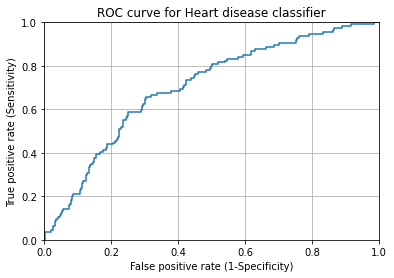

In [262]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_yes[:,1])
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Heart disease classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

In [263]:
from sklearn.metrics import roc_auc_score

In [206]:
roc_auc_score(y_test,y_pred_prob_yes[:,1])

0.7001682665783957

### Conclusions

- **Men seem to be more susceptible to heart disease than women.Increase in Age,number of cigarettes smoked per day and systolic Blood Pressure also show increasing odds of having heart disease.**

- **Total cholesterol shows no significant change in the odds of CHD. This could be due to the presence of 'good cholesterol(HDL) in the total cholesterol reading.Glucose too causes a very negligible change in odds (0.2%)**

- **The model predicted with 0.88 accuracy. The model is more specific than sensitive.**

- **The Area under the ROC curve is 73.5 which is somewhat satisfactory.**

- **Overall model could be improved with more data.**

### Decision Tree

In [264]:
from sklearn.tree import DecisionTreeClassifier 
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [265]:
ypredtr = dt.predict(x_train)
ypredts = dt.predict(x_test)

In [266]:
print(classification_report(y_test,ypredts))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85       636
           1       0.23      0.25      0.24       114

    accuracy                           0.76       750
   macro avg       0.55      0.55      0.55       750
weighted avg       0.77      0.76      0.76       750



In [267]:
from sklearn.metrics import confusion_matrix

In [269]:
cm = confusion_matrix(y_test,ypredts)
cm

array([[538,  98],
       [ 85,  29]], dtype=int64)

### Random Forest

In [100]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=50)
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=50)

In [101]:
yRpredtr = rf.predict(x_train)
yRpredts = rf.predict(x_test)

In [102]:
print(classification_report(y_test,yRpredts))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91       636
           1       0.29      0.05      0.09       114

    accuracy                           0.84       750
   macro avg       0.57      0.51      0.50       750
weighted avg       0.77      0.84      0.79       750



In [103]:
from sklearn.metrics import confusion_matrix

In [104]:
confusion_matrix(y_test,yRpredts)

array([[621,  15],
       [108,   6]], dtype=int64)

### Hyperparameter tuning : changing the number of decision trees and give the most optimal value of number of decision trees

In [798]:
par = {'n_estimators':[50,100,150,200],'max_depth':[3,4,5],
       'min_samples_leaf':[3,4,5],'min_samples_split':[4,6,5]} # 108 combinations
rfgs = RandomForestClassifier()
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(estimator=rfgs,param_grid=par)
gsmodel = gs.fit(x_train,y_train)
gsmodel.best_params_

{'max_depth': 5,
 'min_samples_leaf': 3,
 'min_samples_split': 6,
 'n_estimators': 200}

In [799]:
rf = RandomForestClassifier(n_estimators=100,min_samples_leaf=5,
                            max_depth=5,min_samples_split=4)
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=4)

In [800]:
ypredtr = rf.predict(x_train)
ypredts = rf.predict(x_test)

In [801]:
print(classification_report(y_train,ypredtr))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2875
           1       0.95      0.03      0.07       515

    accuracy                           0.85      3390
   macro avg       0.90      0.52      0.49      3390
weighted avg       0.87      0.85      0.79      3390



In [802]:
print(classification_report(y_test,ypredts))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       719
           1       1.00      0.02      0.03       129

    accuracy                           0.85       848
   macro avg       0.92      0.51      0.47       848
weighted avg       0.87      0.85      0.78       848



### KNN

In [803]:
from sklearn.neighbors import KNeighborsClassifier

In [804]:
knn = KNeighborsClassifier(n_neighbors=1)

In [805]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [807]:
pred = knn.predict(x_test)

In [808]:
print(confusion_matrix(y_test,pred))

[[628  91]
 [ 98  31]]


In [809]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       719
           1       0.25      0.24      0.25       129

    accuracy                           0.78       848
   macro avg       0.56      0.56      0.56       848
weighted avg       0.77      0.78      0.77       848



In [810]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

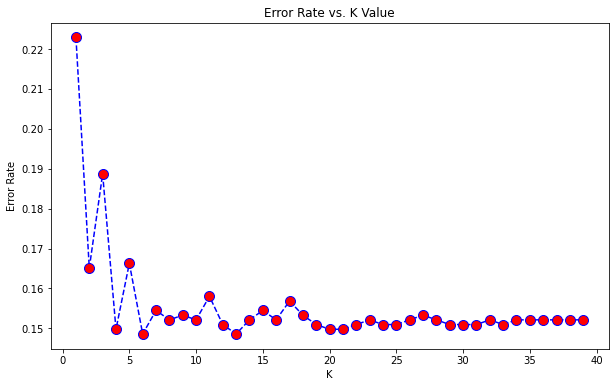

In [811]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [812]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(x_train,y_train)
pred = knn.predict(x_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[628  91]
 [ 98  31]]


              precision    recall  f1-score   support

           0       0.87      0.87      0.87       719
           1       0.25      0.24      0.25       129

    accuracy                           0.78       848
   macro avg       0.56      0.56      0.56       848
weighted avg       0.77      0.78      0.77       848



In [815]:
# NOW WITH K=11
knn = KNeighborsClassifier(n_neighbors=11)

knn.fit(x_train,y_train)
pred = knn.predict(x_test)

print('WITH K=11')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=11


[[706  13]
 [121   8]]


              precision    recall  f1-score   support

           0       0.85      0.98      0.91       719
           1       0.38      0.06      0.11       129

    accuracy                           0.84       848
   macro avg       0.62      0.52      0.51       848
weighted avg       0.78      0.84      0.79       848



### SVC

In [818]:
from sklearn.svm import SVC
model = SVC()
model.fit(x_train,y_train)

SVC()

In [819]:
predictions = model.predict(x_test)

In [820]:
print(confusion_matrix(y_test,predictions))

[[716   3]
 [127   2]]


In [821]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       719
           1       0.40      0.02      0.03       129

    accuracy                           0.85       848
   macro avg       0.62      0.51      0.47       848
weighted avg       0.78      0.85      0.78       848

